In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings


plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (16,8)
plt.rc('font', family='Malgun Gothic')
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 데이터

In [53]:
total = pd.read_csv("C:/Users/keogu/Desktop/IGPS/Data/서울시_데이터종합_수정.csv")

In [54]:
total2 = pd.read_csv("C:/Users/keogu/Desktop/IGPS/Data/서울시_데이터종합_수정2.csv")

In [55]:
total.set_index(['대여소번호'], inplace=True)

In [56]:
total2.set_index(['대여소번호'], inplace=True)

# 회귀분석 - 수정전

## 스케일링

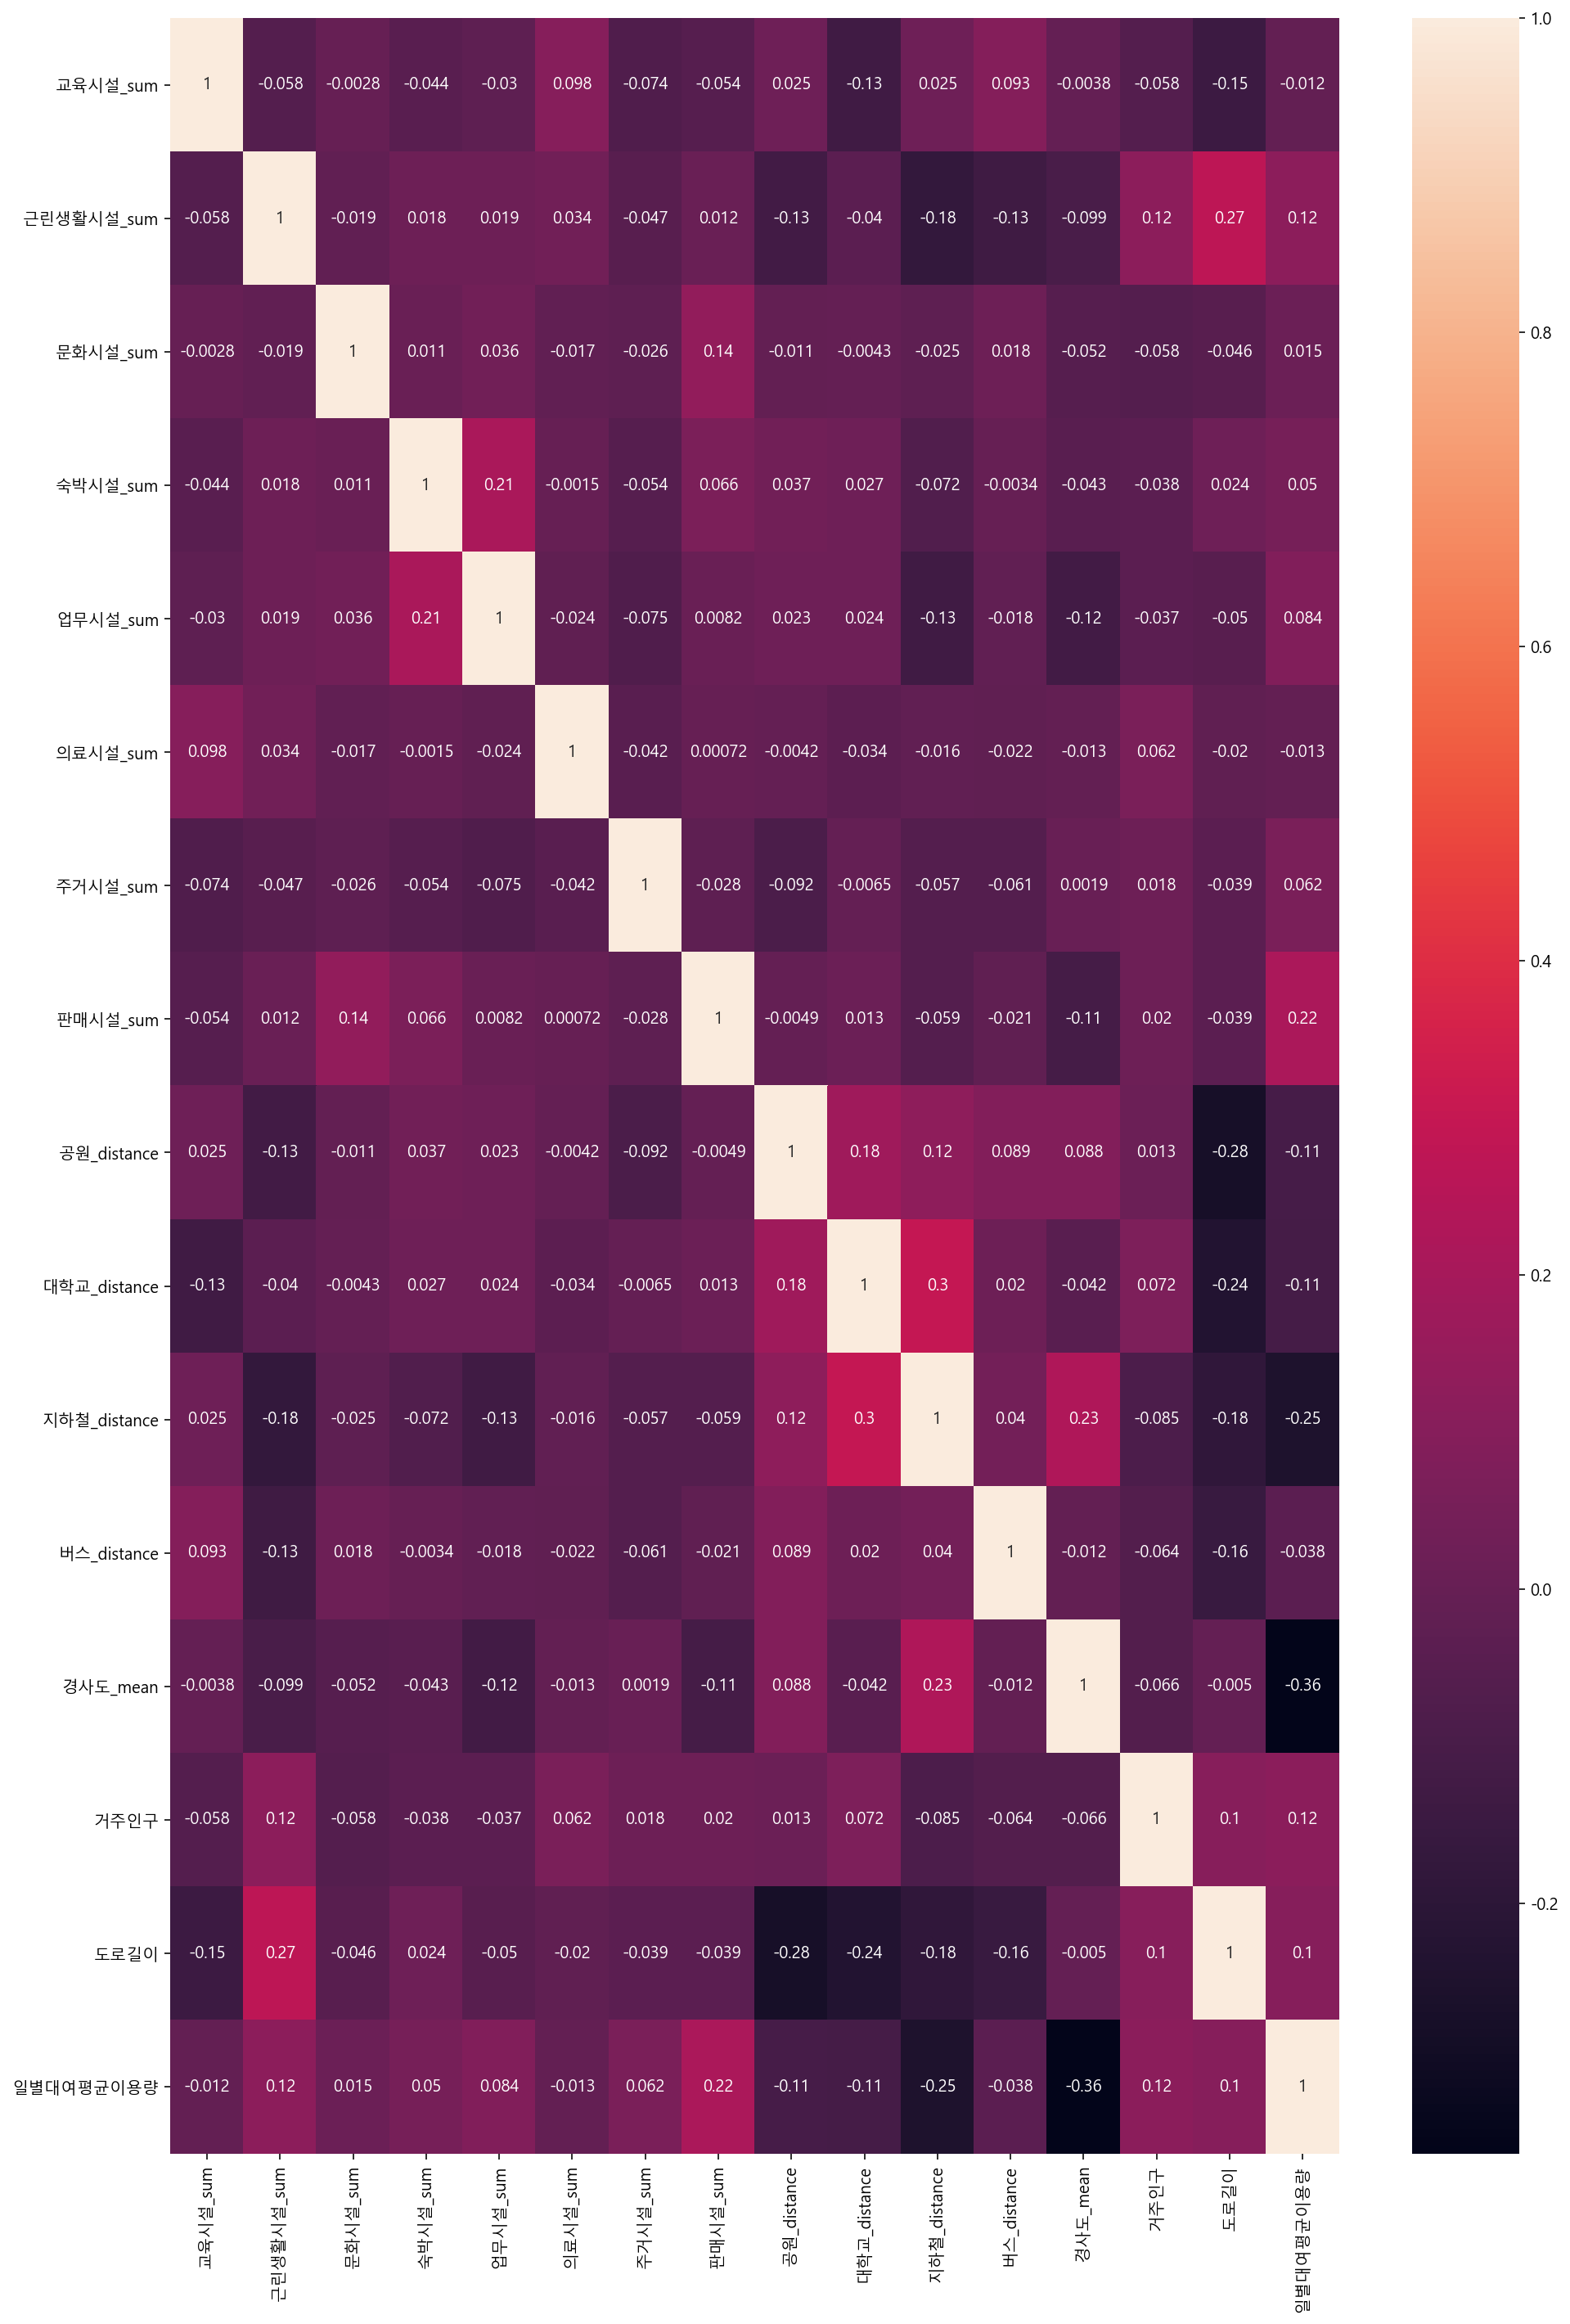

In [57]:
plt.figure(figsize=(16,24))
sns.heatmap(total.corr(), annot=True)

In [58]:
# 다중공선성 확인
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('일별대여평균이용량 ~  교육시설_sum + 근린생활시설_sum + 문화시설_sum + 숙박시설_sum + 업무시설_sum + 의료시설_sum + 주거시설_sum + 판매시설_sum + 공원_distance + 대학교_distance + 지하철_distance + 버스_distance + 경사도_mean + 거주인구 + 도로길이', data=total, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,22.0,Intercept
1,1.1,교육시설_sum
2,1.1,근린생활시설_sum
3,1.0,문화시설_sum
4,1.1,숙박시설_sum
5,1.1,업무시설_sum
6,1.0,의료시설_sum
7,1.0,주거시설_sum
8,1.0,판매시설_sum
9,1.1,공원_distance


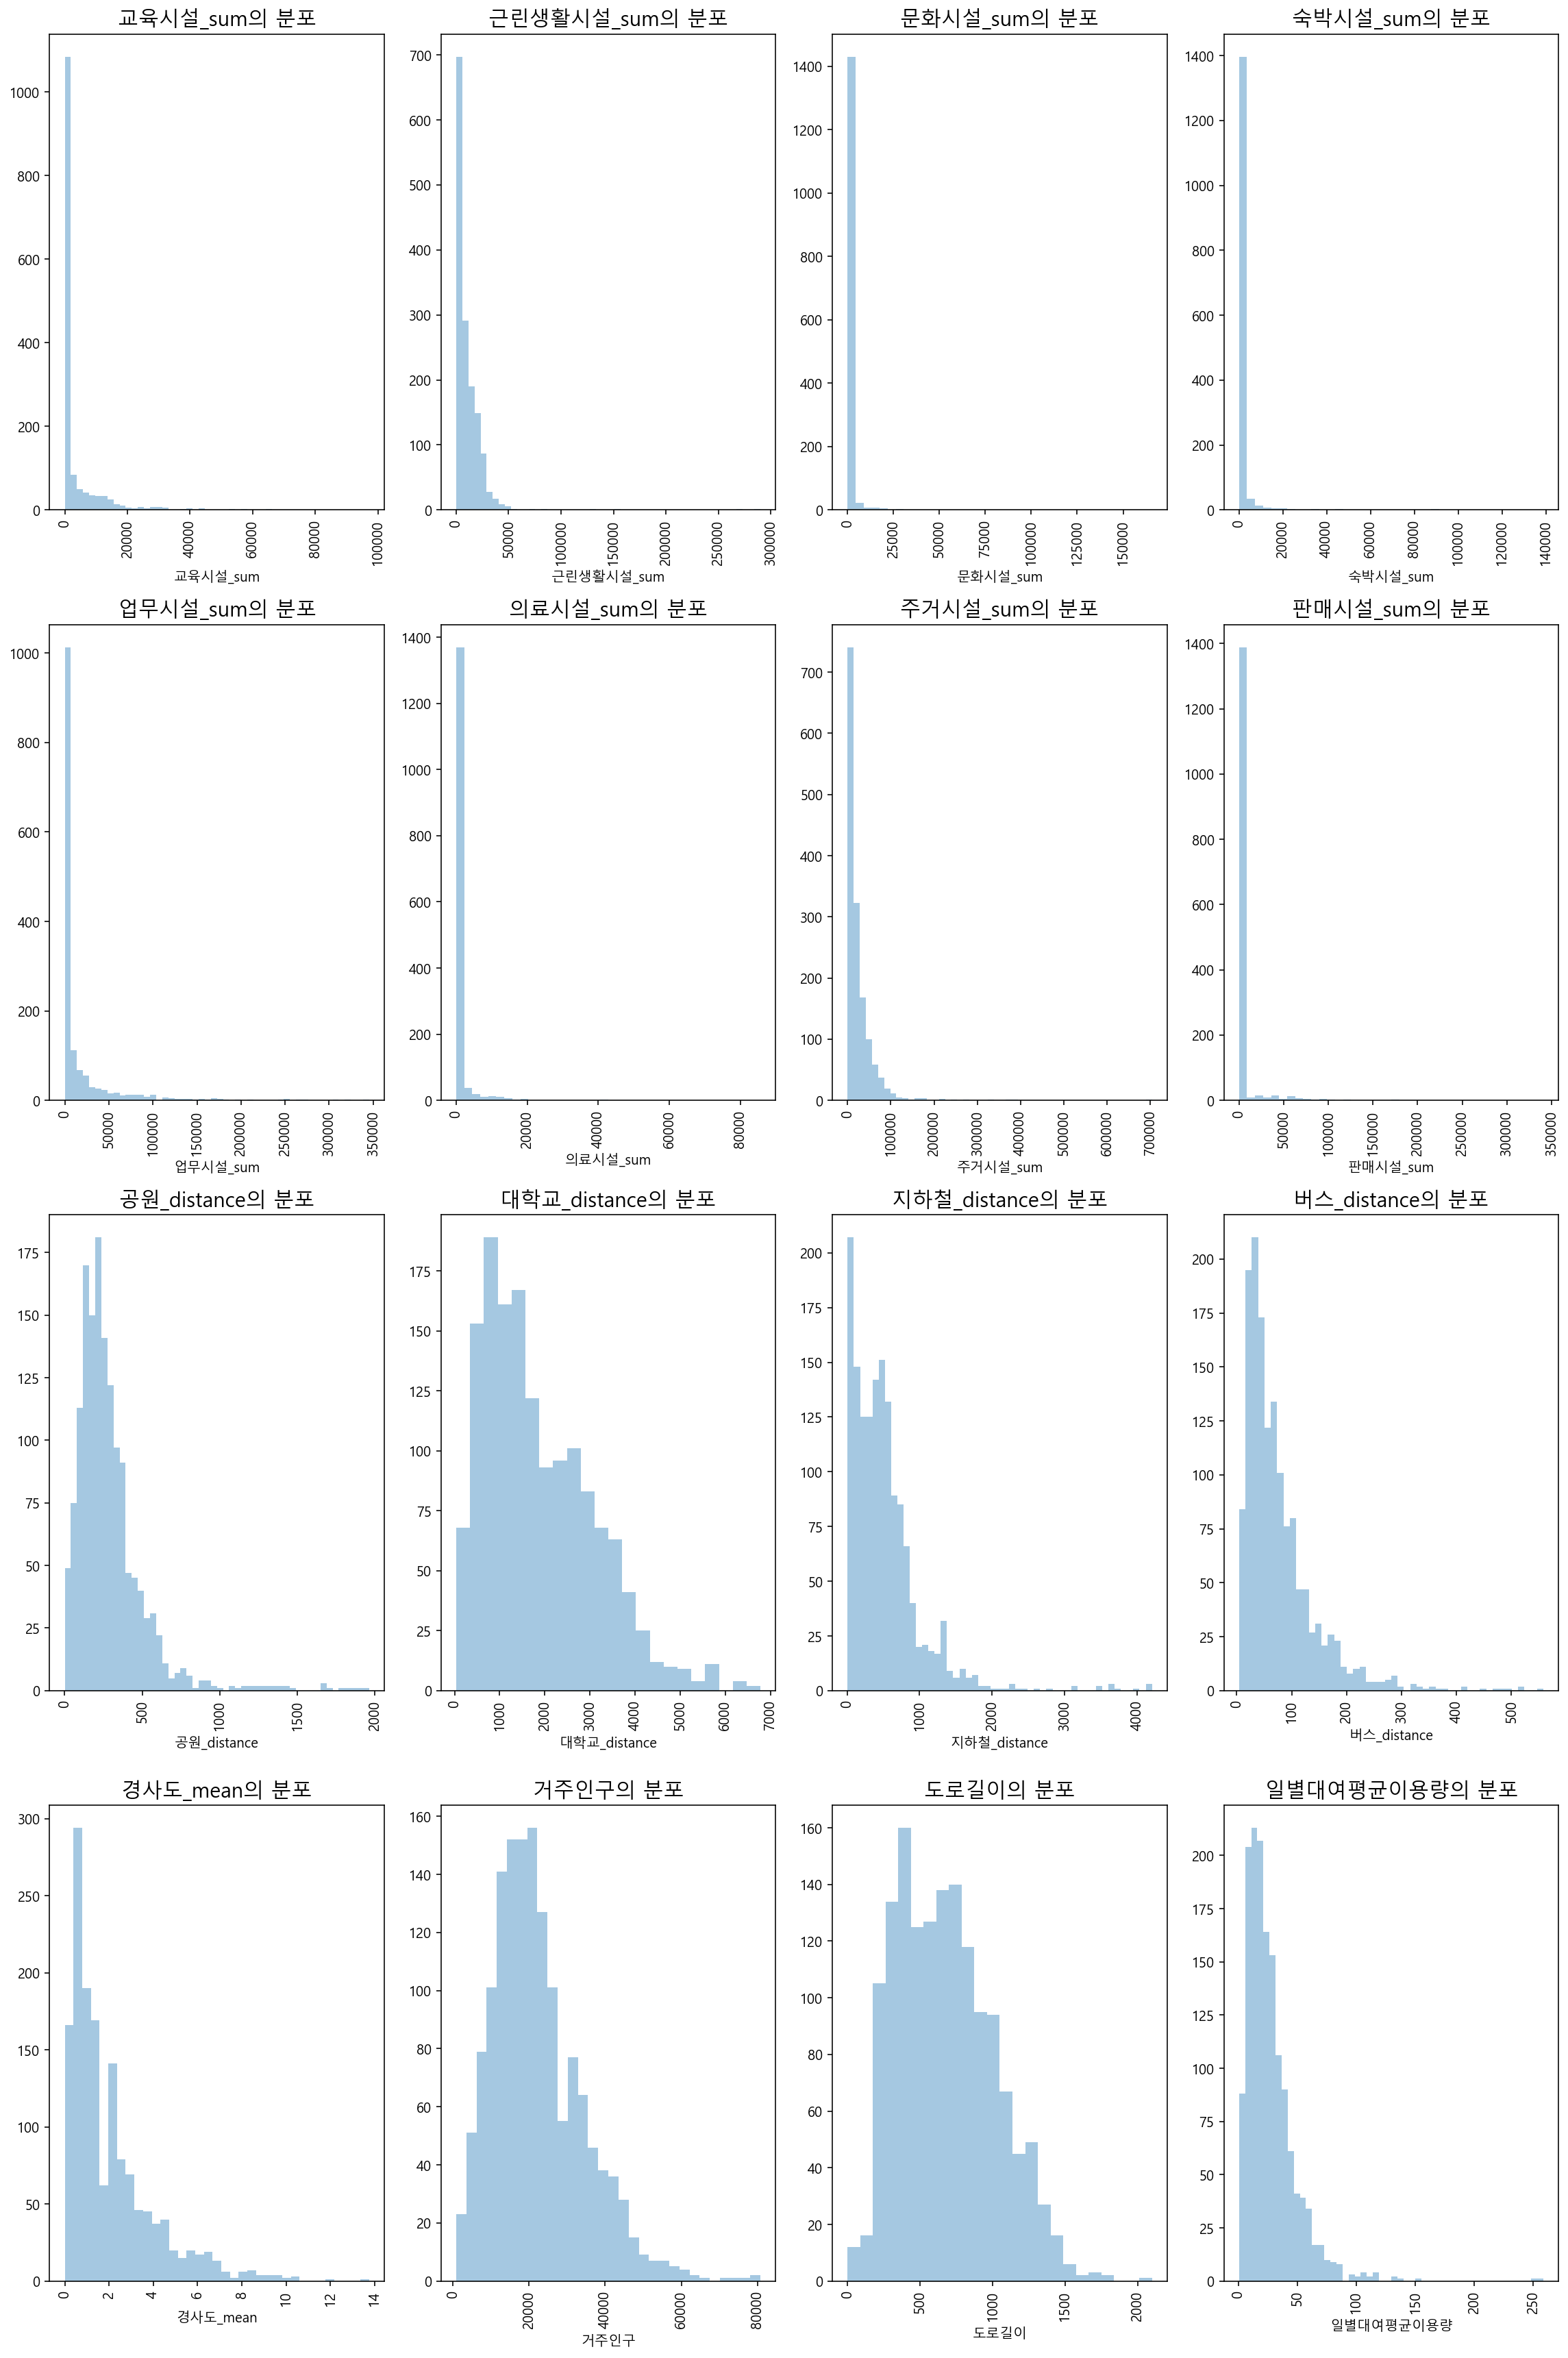

In [59]:
# 분포확인
plt.figure(figsize=(16,24)) 
n=1
for feature in total.columns:
    ax = plt.subplot(4,4,n) 
    plt.title('%s의 분포' %feature, fontsize=15)
    sns.distplot(total[feature], kde =False)
    plt.xticks(rotation=90)
    n+=1
plt.tight_layout() 
plt.show()

In [60]:
# 왜도 확인
from scipy.stats import skew

features_index = total.dtypes[total.dtypes != 'object'].index
skew_features = total[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

문화시설_sum        17.913397
숙박시설_sum        11.841145
의료시설_sum        10.670393
판매시설_sum         9.106897
근린생활시설_sum       8.937168
주거시설_sum         7.143945
교육시설_sum         4.636081
업무시설_sum         4.076714
지하철_distance     2.959794
일별대여평균이용량        2.951318
공원_distance      2.918526
버스_distance      2.488875
경사도_mean         1.710297
dtype: float64


In [61]:
# 복사
total_log = total.copy()

In [62]:
# log변환
total_log[skew_features_top.index] = np.log1p(total[skew_features_top.index])
total_log

,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이,일별대여평균이용량
대여소번호,,,,,,,,,,,,,,,,
502.0,0.000000,0.000000,0.000000,0.0,6.810804,0.0,11.831935,0.000000,4.930944,1430.131460,4.040821,4.097812,0.405465,24085,714.440640,5.559163
207.0,0.000000,5.092092,0.000000,0.0,0.000000,0.0,11.039396,0.000000,5.351727,2254.225628,4.290482,3.473748,0.693147,15710,356.416445,5.529168
3533.0,0.000000,8.659472,8.454994,0.0,0.000000,0.0,7.050461,11.412336,5.092176,639.201940,5.175335,3.781491,0.000000,43626,549.726995,4.914326
1210.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,5.785889,2761.514679,4.984205,4.268382,0.287682,24052,348.694407,4.897973
1308.0,10.588089,10.211730,6.315521,0.0,8.079733,0.0,8.999481,0.000000,5.809243,749.646476,6.014817,2.572870,0.810930,41364,1258.678353,4.772216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664.0,11.027798,0.000000,8.938963,0.0,0.000000,0.0,0.000000,0.000000,5.808780,88.481654,6.386064,5.918530,1.098612,8727,0.000000,2.191750
2287.0,0.000000,8.250980,0.000000,0.0,0.000000,0.0,8.465902,0.000000,5.236975,5396.477786,8.152100,5.610680,2.133509,8164,749.655227,0.509455
2391.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,8.148156,0.000000,5.907343,4119.802431,7.096272,4.982320,1.704748,14769,345.607938,0.459677


In [63]:
y_target = total_log['일별대여평균이용량']
X_features = total_log.drop('일별대여평균이용량', axis=1, inplace=False)

In [64]:
y_target_scaled = y_target.copy()
X_features_scaled = X_features.copy()

In [65]:
from sklearn.preprocessing import MinMaxScaler

#원래 값을 구하기 위해?
scaler_x = MinMaxScaler()
X_features_scaled = scaler_x.fit_transform(X_features)

scaler_y = MinMaxScaler()
y_target_scaled = scaler_y.fit_transform(y_target.values.reshape(-1,1))

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_target_scaled, test_size=0.2, random_state=156)

## Sklearn

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평가
def evaluate_regr(y,pred):
    mse = mean_squared_error(y,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y,pred)
    r2 = r2_score(y,pred)
    print('MSE 값: {0:.3f}, RMSE 값: {1:.3f}, MAE 값: {2:.3f}, R2 값: {3:.3f}'.format(mse,rmse,mae,r2))

# 예측
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)

In [68]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression,ElasticNet

ridge = Ridge()
lasso = Lasso()
lr = LinearRegression()

for model in [lr, ridge, lasso]:
    get_model_predict(model, X_train, X_test, y_train, y_test)

### LinearRegression ###
MSE 값: 0.013, RMSE 값: 0.115, MAE 값: 0.092, R2 값: 0.371
### Ridge ###
MSE 값: 0.013, RMSE 값: 0.115, MAE 값: 0.092, R2 값: 0.370
### Lasso ###
MSE 값: 0.021, RMSE 값: 0.145, MAE 값: 0.114, R2 값: -0.001


### 파라미터 조정

In [69]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 CV시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse,4),grid_model.best_params_))

In [70]:
Ridge_alp_list=[]
alp = np.arange(0,100,0.01)
for i in alp:
    Ridge_alp_list.append(round(i,2))
    
Lasso_alp_list=[]
alp = np.arange(0,1,0.01)
for i in alp:
    Lasso_alp_list.append(round(i,2))

In [18]:
ridge_params = {'alpha':Ridge_alp_list}
lasso_params = {'alpha':Lasso_alp_list}

In [19]:
print_best_params(ridge, ridge_params)

Ridge 5 CV시 최적 평균 RMSE 값:0.1154, 최적 alpha:{'alpha': 1.62}


In [20]:
print_best_params(lasso, lasso_params)

Lasso 5 CV시 최적 평균 RMSE 값:0.1155, 최적 alpha:{'alpha': 0.0}


In [50]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression,ElasticNet

ridge = Ridge(alpha=1.62)
lasso = Lasso(alpha=0)
lr = LinearRegression()

for model in [lr, ridge, lasso]:
    get_model_predict(model, X_train, X_test, y_train, y_test)

### LinearRegression ###
MSE 값: 0.013, RMSE 값: 0.115, MAE 값: 0.092, R2 값: 0.371
### Ridge ###
MSE 값: 0.013, RMSE 값: 0.115, MAE 값: 0.092, R2 값: 0.369
### Lasso ###
MSE 값: 0.013, RMSE 값: 0.115, MAE 값: 0.092, R2 값: 0.371


In [76]:
def get_top_bottom_coef(model): 
    coef = pd.Series(data = model.coef_.flatten(), index = X_features.columns )
    coef_high = coef.sort_values(ascending=False).head(15)
    coef_low = coef.sort_values(ascending=False).tail(15)
    return coef_high, coef_low

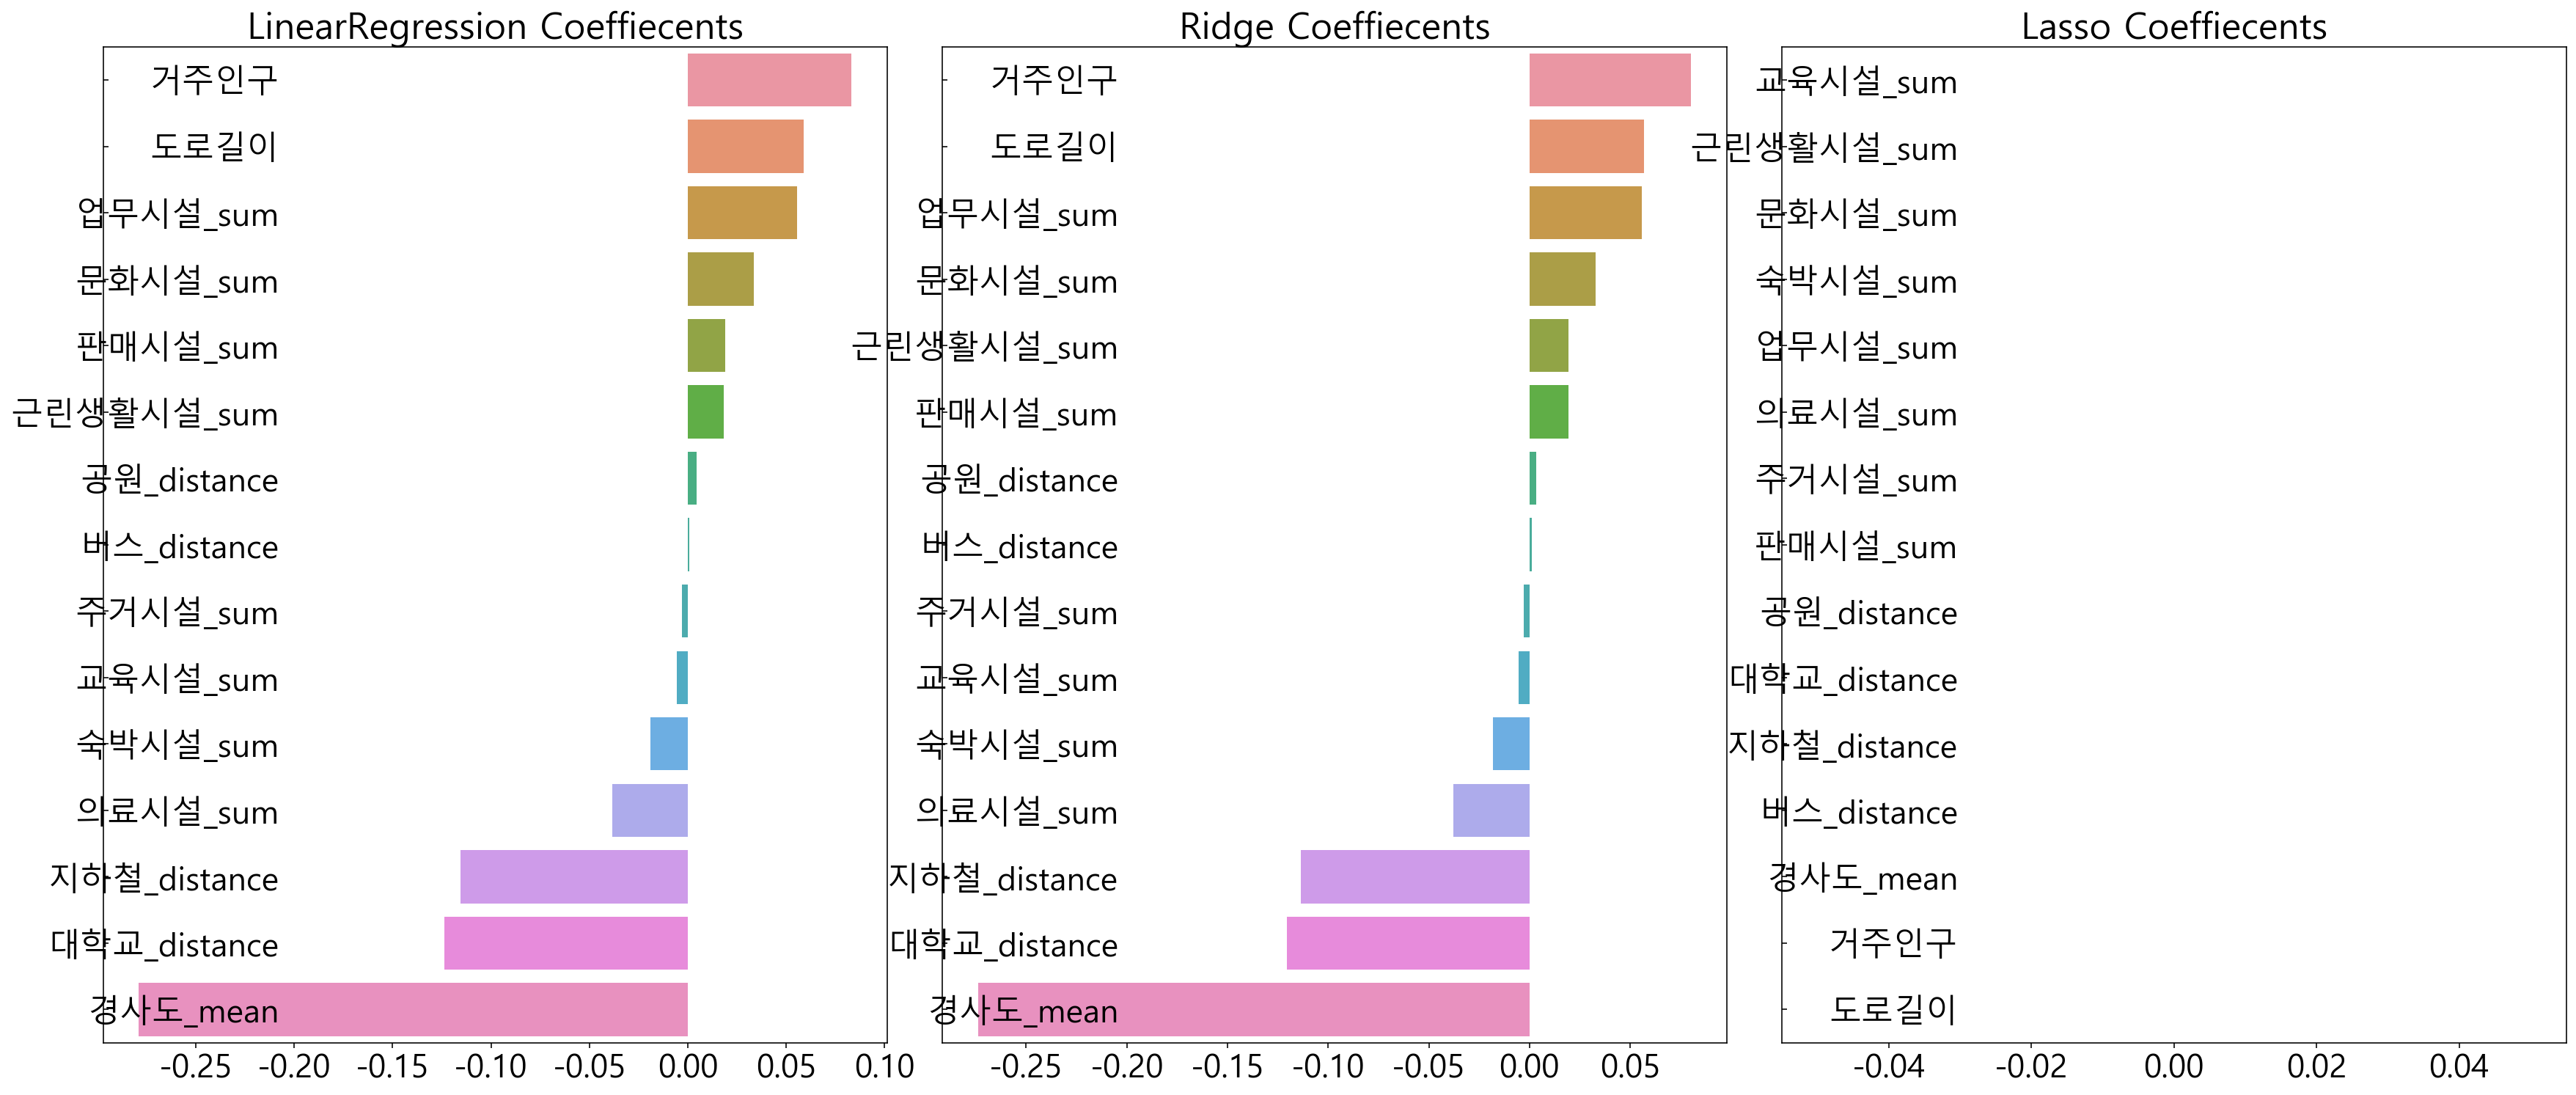

In [77]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr, ridge, lasso]
visualize_coefficient(models)

## 예측값

In [78]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

evaluate_regr(y_test, pred_lr)

MSE 값: 0.013, RMSE 값: 0.115, MAE 값: 0.092, R2 값: 0.371


In [79]:
y_test = scaler_y.inverse_transform(np.array(y_test).reshape(-1,1))
y_test = np.expm1(y_test)

pred_lr= scaler_y.inverse_transform(np.array(pred_lr).reshape(-1,1))
pred_lr = np.expm1(pred_lr)

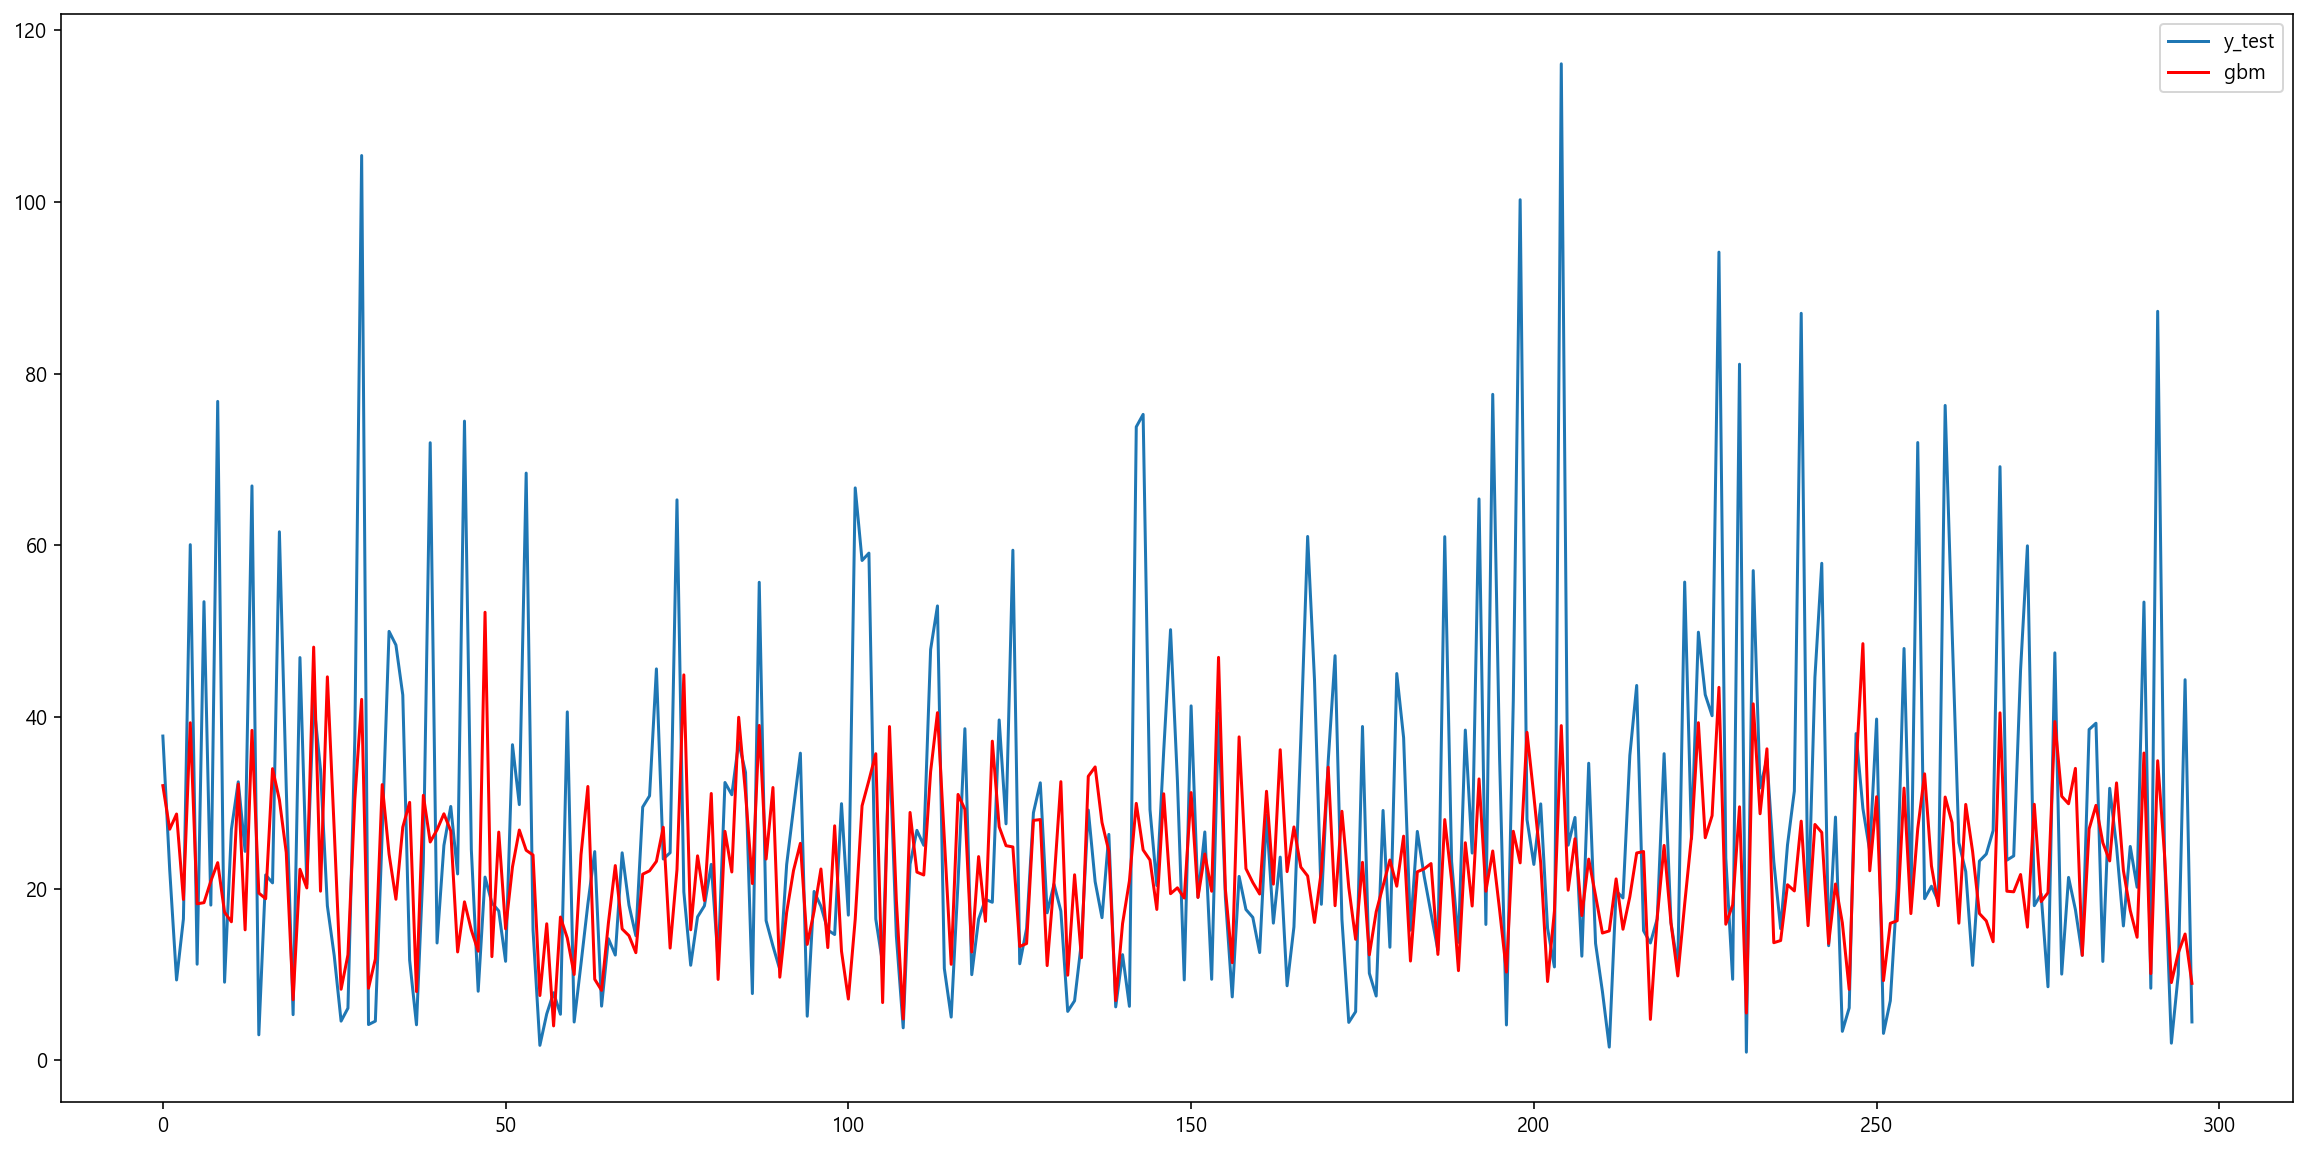

In [80]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='y_test')
plt.plot(pred_lr, 'r', label='gbm')
plt.legend()
plt.show()

In [81]:
pred_lr

array([[31.99415822],
       [26.91536064],
       [28.68725782],
       [18.72840971],
       [39.32118828],
       [18.22405611],
       [18.35708474],
       [20.87221588],
       [23.01969843],
       [17.24325975],
       [16.13198479],
       [32.17090914],
       [15.18997571],
       [38.43822305],
       [19.47801356],
       [18.81534073],
       [33.97282144],
       [30.34186062],
       [24.20282063],
       [ 7.04597816],
       [22.25068994],
       [20.07165817],
       [48.13576959],
       [19.69538977],
       [44.67259075],
       [26.80538264],
       [ 8.26881122],
       [12.27567865],
       [30.36263979],
       [42.04831898],
       [ 8.38819245],
       [11.79370773],
       [32.11653355],
       [24.00830872],
       [18.75563407],
       [27.1571471 ],
       [30.04760133],
       [ 7.99192127],
       [30.87070851],
       [25.42908183],
       [26.85374506],
       [28.71500913],
       [26.71686714],
       [12.6138114 ],
       [18.45346978],
       [15

## 인천시 예상 대여량

In [100]:
ich = pd.read_csv("C:/Users/keogu/Desktop/IGPS/Data/인천시_대여소정보.csv", encoding = 'cp949')

In [101]:
ich

,grid,rank,미추홀구_데이터종합_교육시설_sum,미추홀구_데이터종합_근린생활시설_sum,미추홀구_데이터종합_문화시설_sum,미추홀구_데이터종합_숙박시설_sum,미추홀구_데이터종합_업무시설_sum,미추홀구_데이터종합_의료시설_sum,미추홀구_데이터종합_주거시설_sum,미추홀구_데이터종합_판매시설_sum,미추홀구_데이터종합_공원_distance,미추홀구_데이터종합_대학교_distance,미추홀구_데이터종합_지하철_distance,미추홀구_데이터종합_버스_distance,미추홀구_데이터종합_경사도_mean,미추홀구_데이터종합_거주인구,미추홀구_데이터종합_도로길이
0,3211,1,0.00,6398.2700,7994075.00,0.0,0.0000,0.000,681.770,0.0,414.350416,2042.522003,295.293579,43.297457,1.5,5436,167.433246
1,2783,2,0.00,34650.8265,4841.13,0.0,0.0000,0.000,0.000,33578.9,418.005942,1000.365546,145.981155,27.296763,2.0,12132,200.089197
2,2724,3,0.00,14927.6500,8393.52,0.0,990.6000,0.000,1858.980,33578.9,302.970723,1057.394493,237.953719,41.047116,2.0,12132,200.178224
3,1061,4,0.00,51159.2200,0.00,0.0,87634.3188,0.000,0.000,0.0,623.304372,461.616796,127.875858,130.520513,0.5,23824,86.278613
4,2728,5,0.00,14331.5700,1690.85,0.0,11332.1100,0.000,0.000,0.0,492.159492,1443.647732,66.600216,22.627794,1.0,12132,151.149628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,3098,2648,2407.20,2466.3800,0.00,0.0,0.0000,13265.415,4059.179,0.0,227.525770,2577.619939,939.433839,57.633144,1.5,9503,259.614351
2648,3115,2649,12943.79,0.0000,0.00,0.0,0.0000,0.000,587.210,0.0,53.243772,2993.882214,1352.499623,255.513536,4.5,7239,34.084735
2649,3586,2650,0.00,0.0000,0.00,0.0,0.0000,0.000,57897.340,0.0,221.413224,3460.695385,345.964117,130.864959,0.5,6826,0.000000
2650,3525,2651,0.00,0.0000,0.00,0.0,0.0000,0.000,61825.810,0.0,218.115457,3346.933911,480.335337,110.914349,1.0,6826,0.000000


In [103]:
ich = ich[ich['rank'] < 100]

## Statsmodels

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [25]:
#OLS검정
#total_log_minmaxscaled
ols = smf.ols(formula = '일별대여평균이용량 ~  교육시설_sum + 근린생활시설_sum + 문화시설_sum + 숙박시설_sum + 업무시설_sum + 의료시설_sum + 주거시설_sum + 판매시설_sum + 공원_distance + 대학교_distance + 지하철_distance + 버스_distance + 경사도_mean + 거주인구 + 도로길이', data = total_log_scaled)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              일별대여평균이용량   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     53.20
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          1.19e-126
Time:                        19:15:52   Log-Likelihood:                 1116.4
No. Observations:                1482   AIC:                            -2201.
Df Residuals:                    1466   BIC:                            -2116.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6548      0.028     23.005      0.000       0.599       0.711
교육시설_sum        -0.0058      0.008     -0.683      0.494      -0.022       0.011
근린생활시설_sum       0.0151      0.015      1.037      0.300      -0.013       0.044
문화시설_sum         0.0227      0.016      1.379      0.168      -0.010       0.055
숙박시설_sum        -0.0122      0.014     -0.902      0.367      -0.039       0.014
업무시설_sum         0.0489      0.009      5.502      0.000       0.031       0.066
의료시설_sum        -0.0310      0.013     -2.320      0.020      -0.057      -0.005
주거시설_sum         0.0090      0.012      0.732      0.464      -0.015       0.033
판매시설_sum         0.0257      0.012      2.141      0.032       0.002       0.049
공원_distance     -0.0074      0.027     -0.275      0.784      -0.060       0.045
대학교_distance    -0.1275      0.018     -7.221      0.000      -0.162      -0.093
지하철_distance    -0.1193      0.019     -6.186      0.000      -0.157      -0.081
버스_distance     -0.0024      0.018     -0.132      0.895      -0.038       0.033
경사도_mean        -0.2886      0.015    -19.853      0.000      -0.317      -0.260
거주인구             0.0857      0.021      4.171      0.000       0.045       0.126
도로길이             0.0580      0.024      2.415      0.016       0.011       0.105
==============================================================================
Omnibus:                        3.301   Durbin-Watson:                   0.738
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.652
Skew:                          -0.006   Prob(JB):                        0.161
Kurtosis:                       3.243   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 유의하지 않은 변수 제거

In [26]:
#OLS검정
#total_log_robustscaled
ols = smf.ols(formula = '일별대여평균이용량 ~ 업무시설_sum + 의료시설_sum + 판매시설_sum + 대학교_distance + 지하철_distance + 경사도_mean + 거주인구 + 도로길이', data = total_log_scaled)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              일별대여평균이용량   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     99.17
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          4.45e-132
Time:                        19:15:52   Log-Likelihood:                 1113.7
No. Observations:                1482   AIC:                            -2209.
Df Residuals:                    1473   BIC:                            -2162.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6560      0.017     39.274      0.000       0.623       0.689
업무시설_sum         0.0507      0.008      6.092      0.000       0.034       0.067
의료시설_sum        -0.0307      0.013     -2.317      0.021      -0.057      -0.005
판매시설_sum         0.0263      0.012      2.212      0.027       0.003       0.050
대학교_distance    -0.1300      0.017     -7.501      0.000      -0.164      -0.096
지하철_distance    -0.1195      0.019     -6.233      0.000      -0.157      -0.082
경사도_mean        -0.2888      0.014    -20.039      0.000      -0.317      -0.261
거주인구             0.0847      0.020      4.151      0.000       0.045       0.125
도로길이             0.0752      0.020      3.764      0.000       0.036       0.114
==============================================================================
Omnibus:                        3.800   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                4.222
Skew:                          -0.033   Prob(JB):                        0.121
Kurtosis:                       3.253   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 회귀분석 - 수정후

## 스케일링

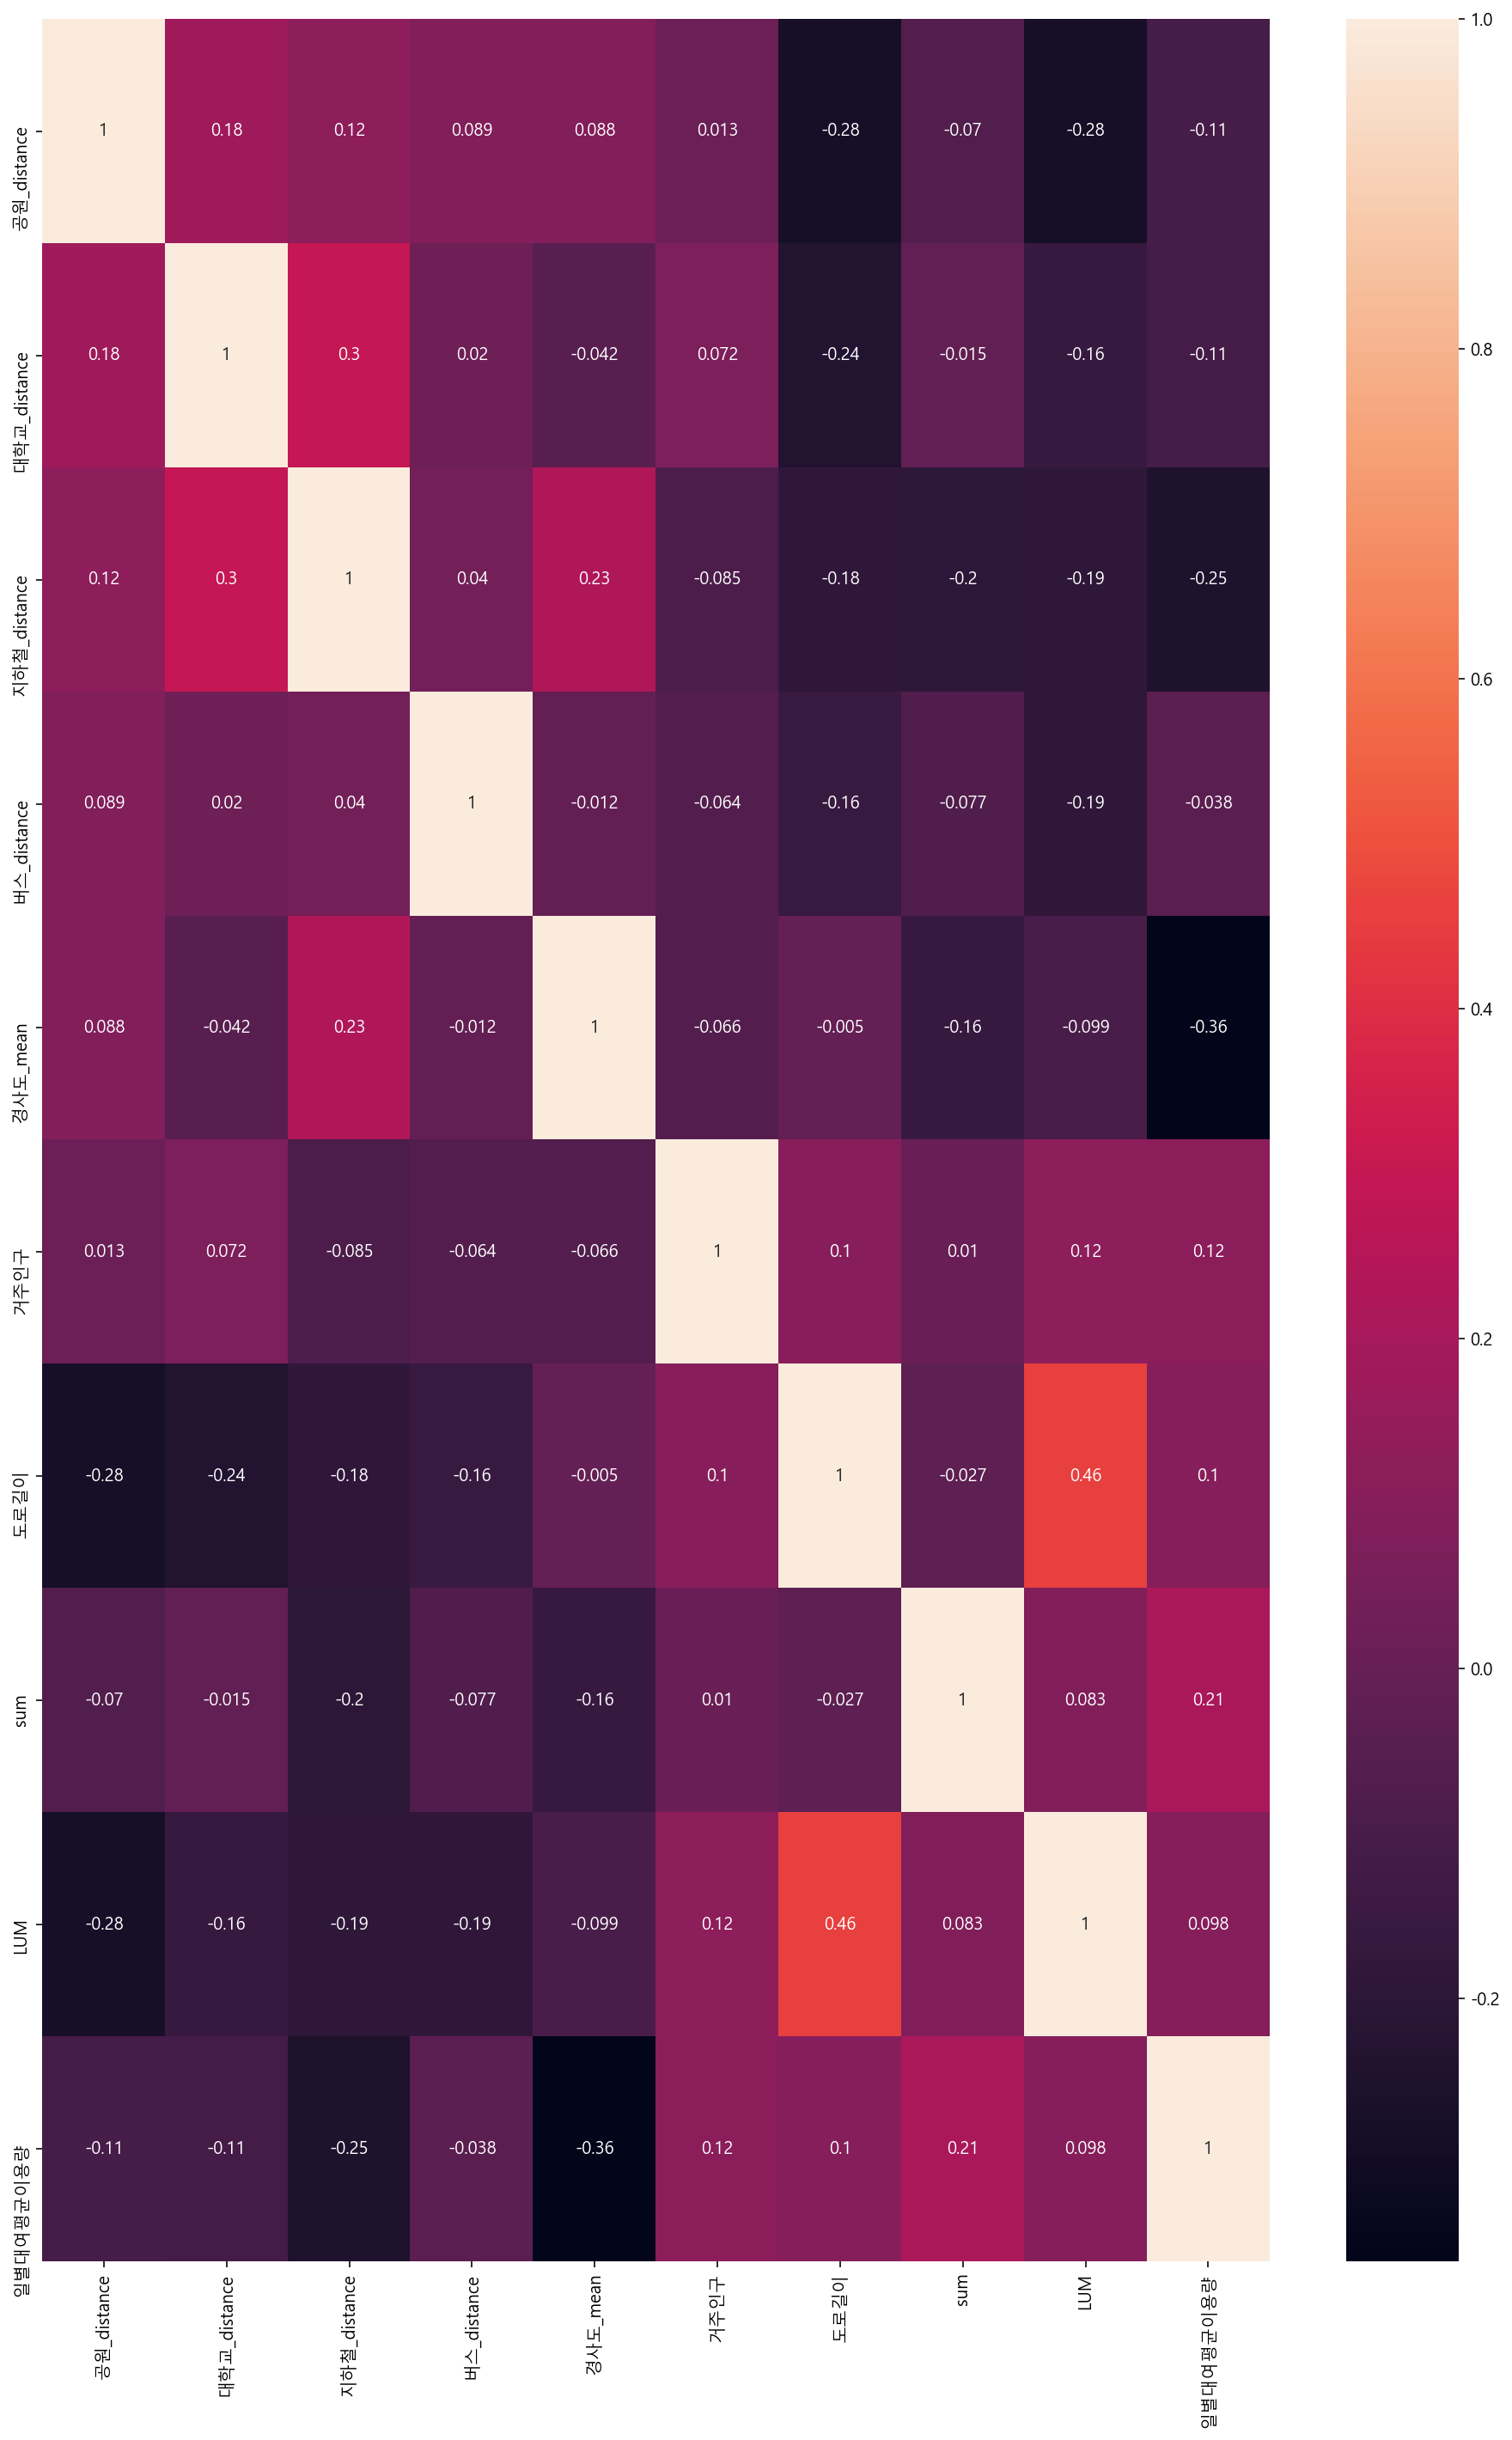

In [27]:
plt.figure(figsize=(16,24))
sns.heatmap(total2.corr(), annot=True)

In [28]:
# 다중공선성 확인
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('일별대여평균이용량 ~ 공원_distance + 대학교_distance + 지하철_distance + 버스_distance + 경사도_mean + 거주인구 + 도로길이 + sum + LUM', data=total2, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,22.9,Intercept
1,1.1,공원_distance
2,1.2,대학교_distance
3,1.2,지하철_distance
4,1.1,버스_distance
5,1.1,경사도_mean
6,1.0,거주인구
7,1.4,도로길이
8,1.1,sum
9,1.4,LUM


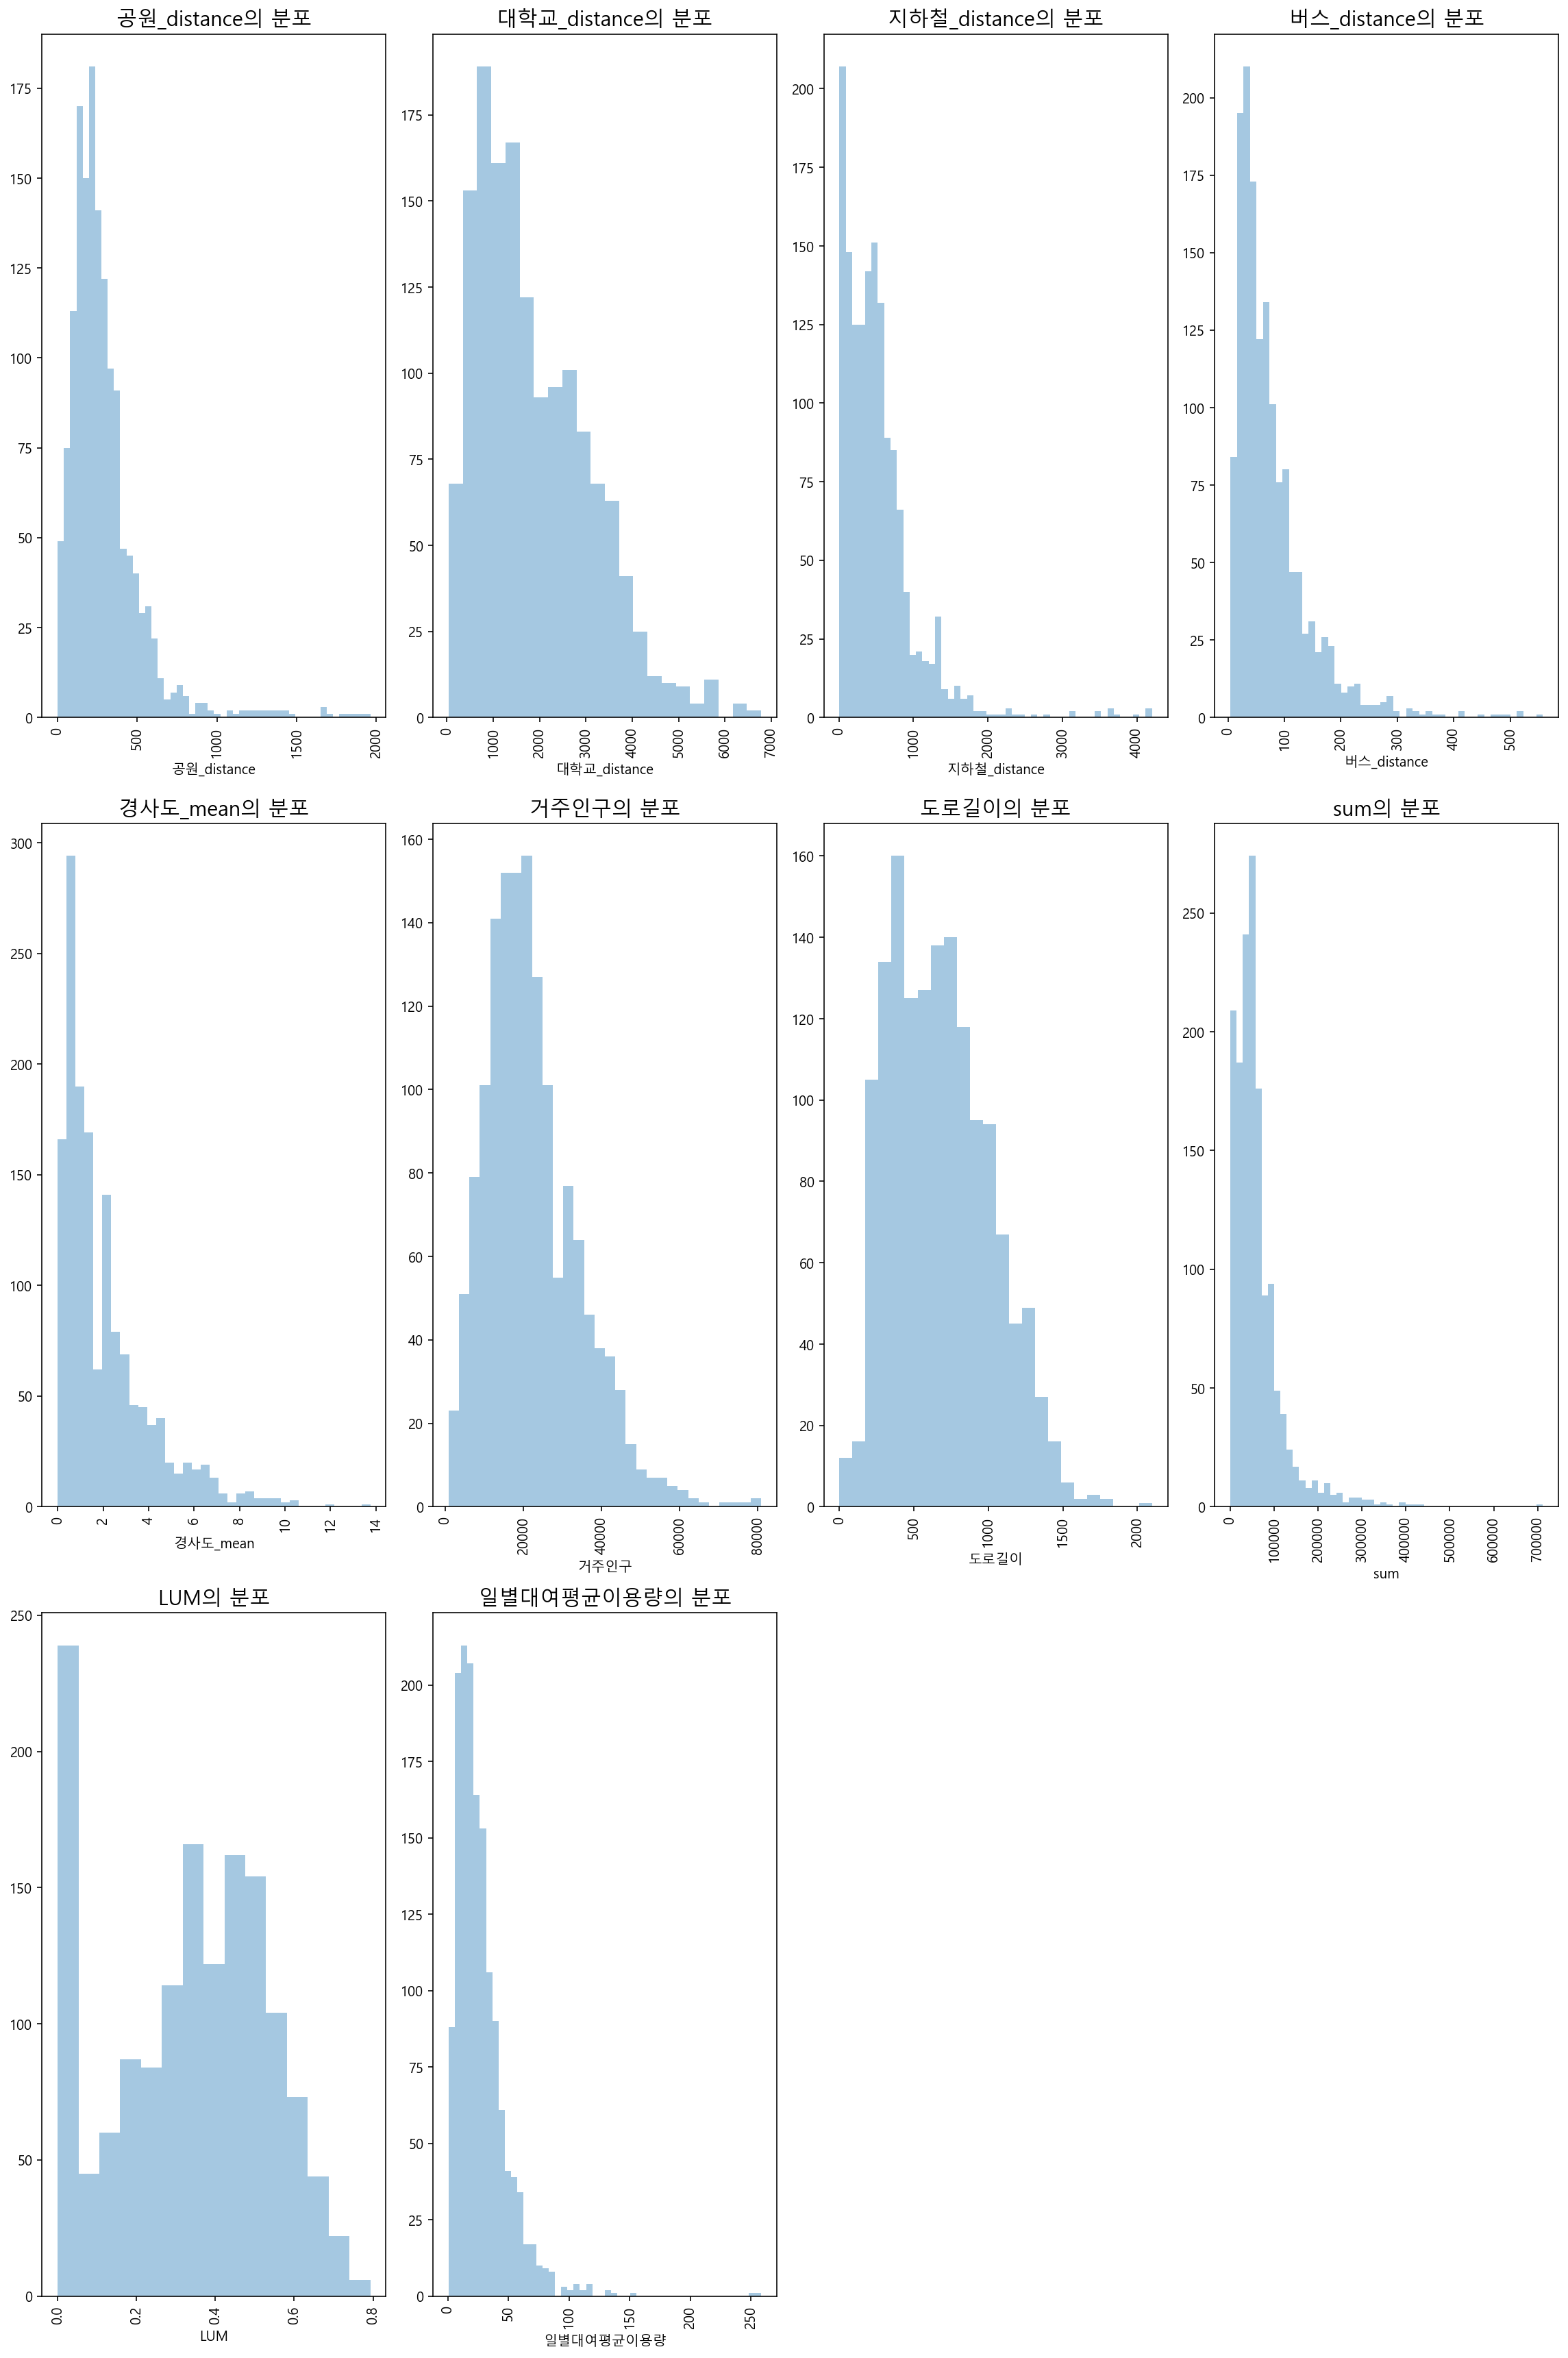

In [29]:
# 분포확인
plt.figure(figsize=(16,24)) 
n=1
for feature in total2.columns:
    ax = plt.subplot(3,4,n) 
    plt.title('%s의 분포' %feature, fontsize=15)
    sns.distplot(total2[feature], kde =False)
    plt.xticks(rotation=90)
    n+=1
plt.tight_layout() 
plt.show()

In [85]:
# 왜도 확인
from scipy.stats import skew

features_index = total2.dtypes[total2.dtypes != 'object'].index
skew_features = total2[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

sum             3.084214
지하철_distance    2.959794
일별대여평균이용량       2.951318
공원_distance     2.918526
버스_distance     2.488875
경사도_mean        1.710297
dtype: float64


In [86]:
# 복사
total2_log = total2.copy()

In [87]:
# log변환
total2_log[skew_features_top.index] = np.log1p(total2[skew_features_top.index])
total2_log

,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이,sum,LUM,일별대여평균이용량
대여소번호,,,,,,,,,,
502.0,4.930944,1430.131460,4.040821,4.097812,0.405465,24085,714.440640,11.838504,0.018970,5.559163
207.0,5.351727,2254.225628,4.290482,3.473748,0.693147,15710,356.416445,11.041990,0.008663,5.529168
3533.0,5.092176,639.201940,5.175335,3.781491,0.000000,43626,549.726995,11.533158,0.222047,4.914326
1210.0,5.785889,2761.514679,4.984205,4.268382,0.287682,24052,348.694407,0.000000,0.000000,4.897973
1308.0,5.809243,749.646476,6.014817,2.572870,0.810930,41364,1258.678353,11.274117,0.534877,4.772216
...,...,...,...,...,...,...,...,...,...,...
664.0,5.808780,88.481654,6.386064,5.918530,1.098612,8727,0.000000,11.144527,0.166815,2.191750
2287.0,5.236975,5396.477786,8.152100,5.610680,2.133509,8164,749.655227,9.057235,0.330571,0.509455
2391.0,5.907343,4119.802431,7.096272,4.982320,1.704748,14769,345.607938,8.148156,0.000000,0.459677


In [88]:
y_target = total2_log['일별대여평균이용량']
X_features = total2_log.drop('일별대여평균이용량', axis=1, inplace=False)

In [89]:
y_target_scaled = y_target.copy()
X_features_scaled = X_features.copy()

In [90]:
from sklearn.preprocessing import MinMaxScaler

#원래 값을 구하기 위해?
scaler_x = MinMaxScaler()
X_features_scaled = scaler_x.fit_transform(X_features)

scaler_y = MinMaxScaler()
y_target_scaled = scaler_y.fit_transform(y_target.values.reshape(-1,1))

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_target_scaled, test_size=0.2, random_state=156)

## Sklearn

In [92]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression,ElasticNet

ridge = Ridge()
lasso = Lasso()
lr = LinearRegression()

for model in [lr, ridge, lasso]:
    get_model_predict(model, X_train, X_test, y_train, y_test)

### LinearRegression ###
MSE 값: 0.013, RMSE 값: 0.114, MAE 값: 0.091, R2 값: 0.384
### Ridge ###
MSE 값: 0.013, RMSE 값: 0.114, MAE 값: 0.091, R2 값: 0.383
### Lasso ###
MSE 값: 0.021, RMSE 값: 0.145, MAE 값: 0.114, R2 값: -0.001


### 파라미터 조정

In [36]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 CV시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse,4),grid_model.best_params_))

In [37]:
Ridge_alp_list=[]
alp = np.arange(0,100,0.01)
for i in alp:
    Ridge_alp_list.append(round(i,2))
    
Lasso_alp_list=[]
alp = np.arange(0,1,0.01)
for i in alp:
    Lasso_alp_list.append(round(i,2))

In [38]:
ridge_params = {'alpha':Ridge_alp_list}
lasso_params = {'alpha':Lasso_alp_list}

In [39]:
print_best_params(ridge, ridge_params)

Ridge 5 CV시 최적 평균 RMSE 값:0.1165, 최적 alpha:{'alpha': 1.26}


In [40]:
print_best_params(lasso, lasso_params)

Lasso 5 CV시 최적 평균 RMSE 값:0.1165, 최적 alpha:{'alpha': 0.0}


In [44]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression,ElasticNet

ridge = Ridge(alpha=1.26)
lasso = Lasso(alpha=0)
lr = LinearRegression()

for model in [lr, ridge, lasso]:
    get_model_predict(model, X_train, X_test, y_train, y_test)

### LinearRegression ###
MSE 값: 0.013, RMSE 값: 0.114, MAE 값: 0.091, R2 값: 0.384
### Ridge ###
MSE 값: 0.013, RMSE 값: 0.114, MAE 값: 0.091, R2 값: 0.382
### Lasso ###
MSE 값: 0.013, RMSE 값: 0.114, MAE 값: 0.091, R2 값: 0.384


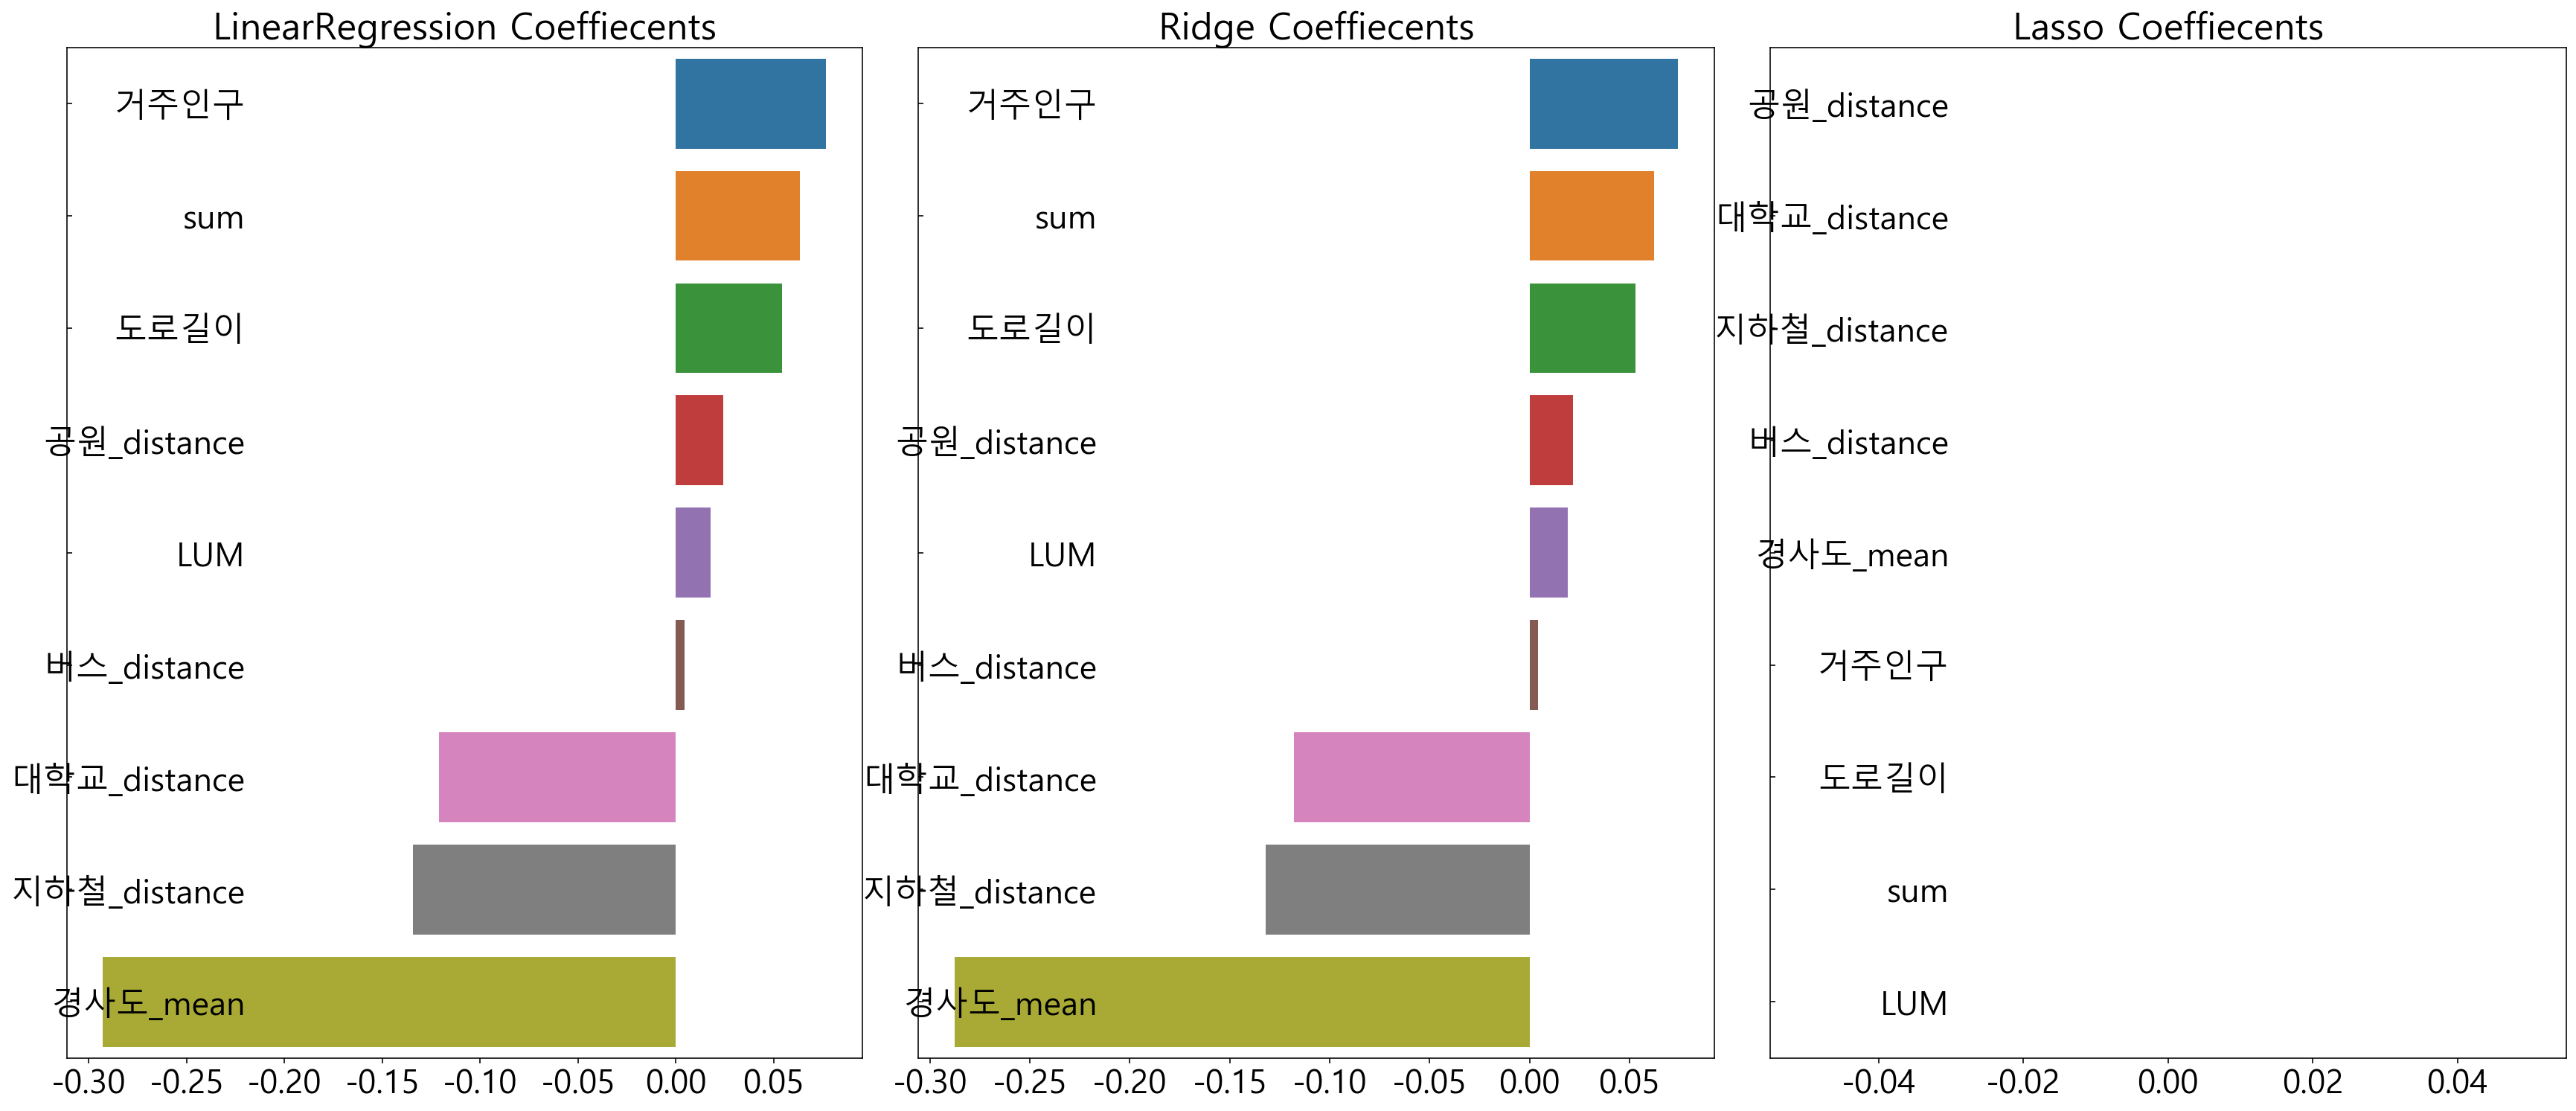

In [93]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr, ridge, lasso]
visualize_coefficient(models)

## 예측값

In [94]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

evaluate_regr(y_test, pred_lr)

MSE 값: 0.013, RMSE 값: 0.114, MAE 값: 0.091, R2 값: 0.384


In [95]:
y_test = scaler_y.inverse_transform(np.array(y_test).reshape(-1,1))
y_test = np.expm1(y_test)

pred_lr= scaler_y.inverse_transform(np.array(pred_lr).reshape(-1,1))
pred_lr = np.expm1(pred_lr)

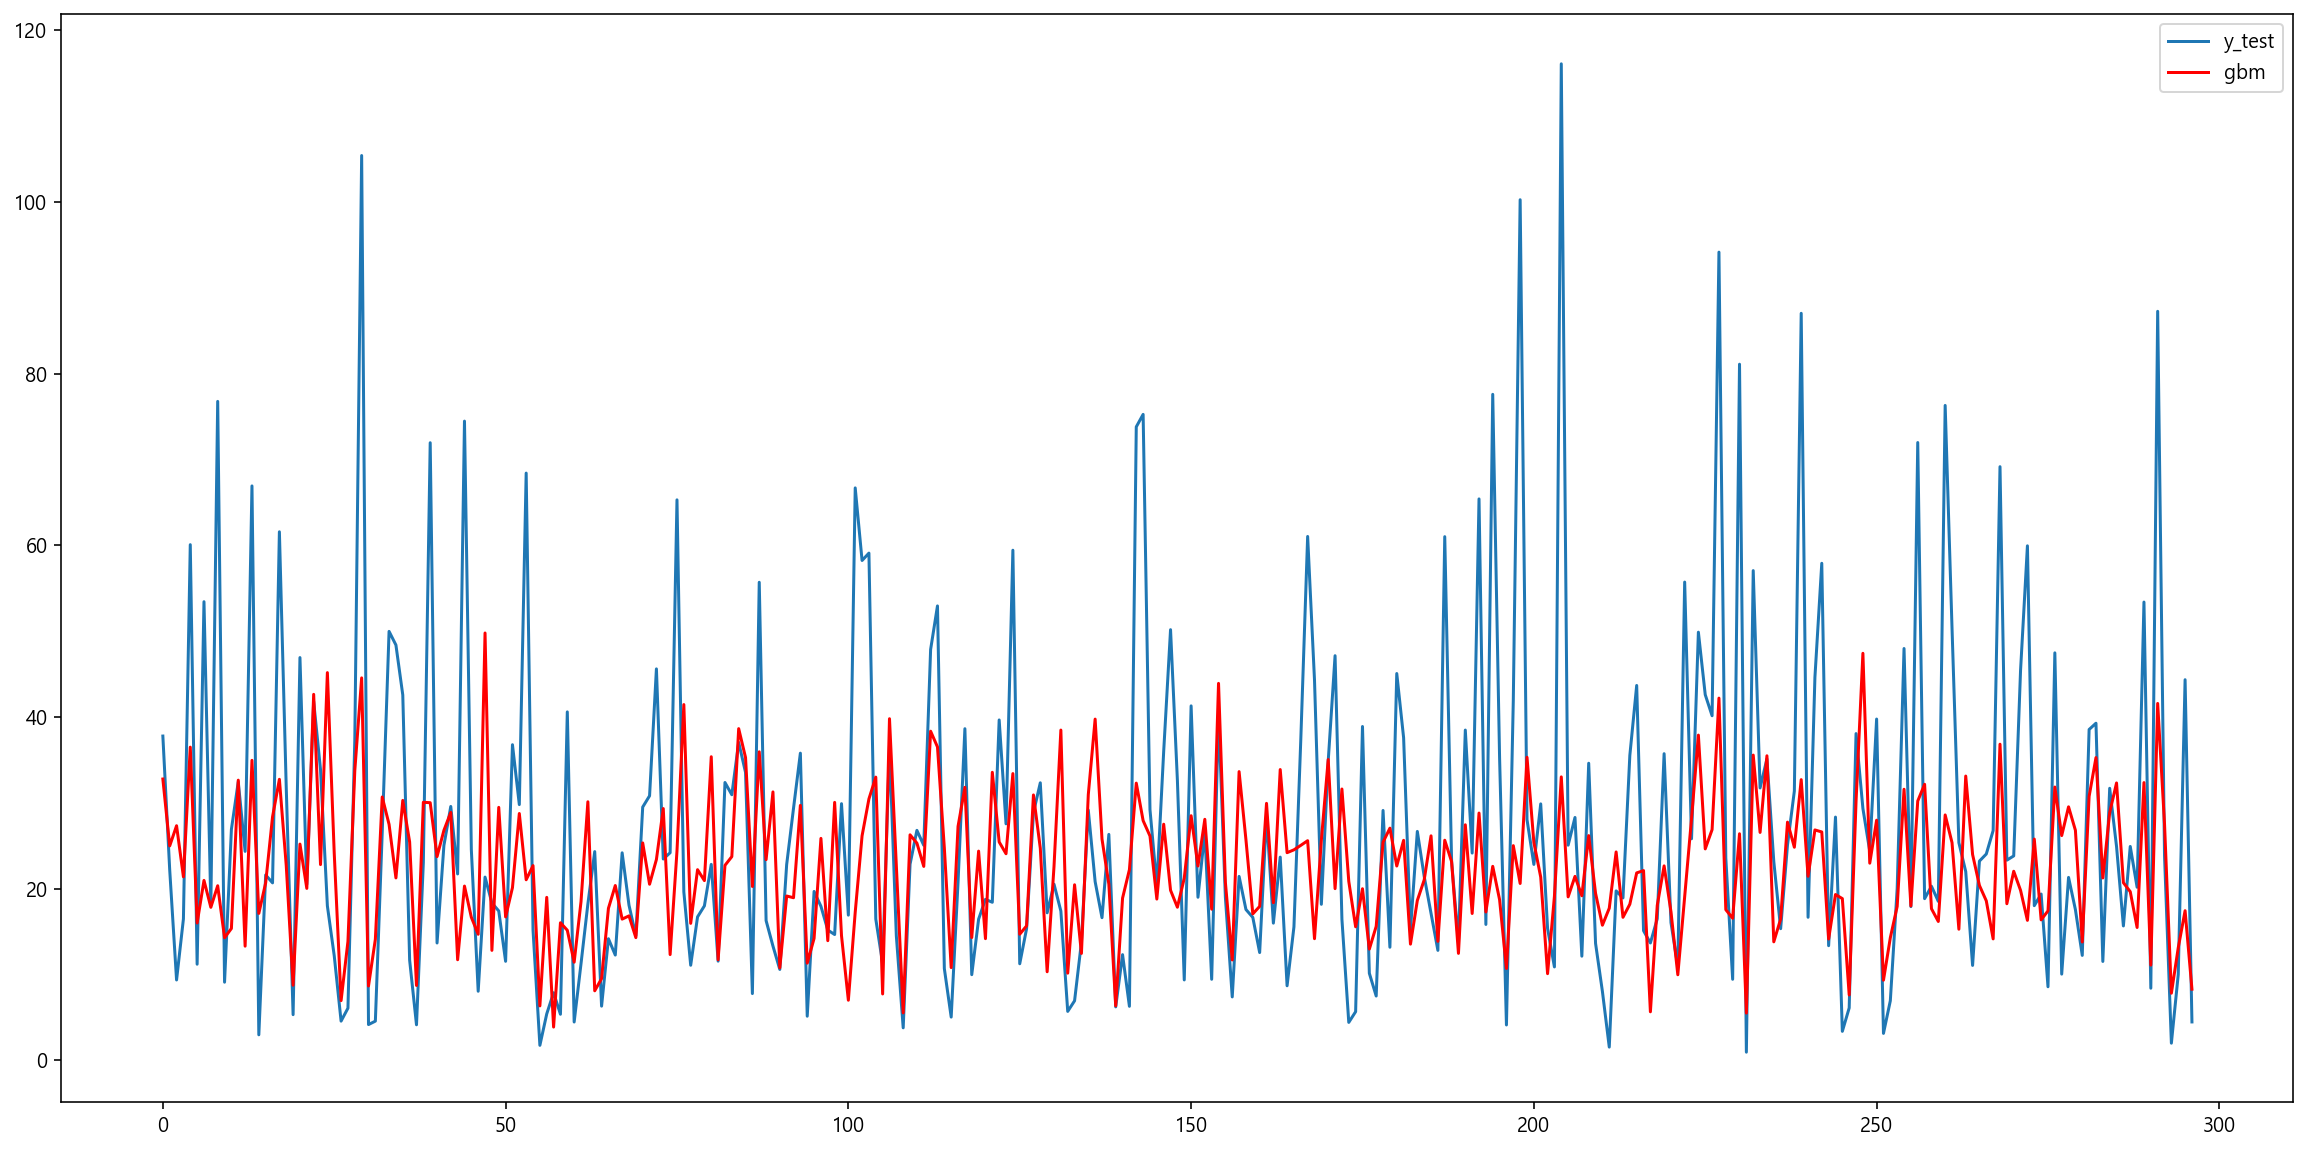

In [96]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='y_test')
plt.plot(pred_lr, 'r', label='gbm')
plt.legend()
plt.show()

## Statsmodels

In [46]:
#OLS검정
#total_log_minmaxscaled
ols = smf.ols(formula = '일별대여평균이용량 ~ 공원_distance + 대학교_distance + 지하철_distance + 버스_distance + 경사도_mean + 거주인구 + 도로길이 + sum + LUM', data = total2_log_scaled)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              일별대여평균이용량   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     83.92
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          8.99e-126
Time:                        19:24:32   Log-Likelihood:                 1101.3
No. Observations:                1482   AIC:                            -2183.
Df Residuals:                    1472   BIC:                            -2130.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6365      0.030     20.909      0.000       0.577       0.696
공원_distance      0.0075      0.027      0.280      0.780      -0.045       0.060
대학교_distance    -0.1234      0.018     -7.011      0.000      -0.158      -0.089
지하철_distance    -0.1361      0.019     -7.170      0.000      -0.173      -0.099
버스_distance     -0.0034      0.018     -0.186      0.853      -0.039       0.032
경사도_mean        -0.3009      0.014    -20.924      0.000      -0.329      -0.273
거주인구             0.0834      0.021      4.047      0.000       0.043       0.124
도로길이             0.0574      0.022      2.591      0.010       0.014       0.101
sum              0.0617      0.017      3.581      0.000       0.028       0.095
LUM              0.0196      0.014      1.351      0.177      -0.009       0.048
==============================================================================
Omnibus:                        3.825   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                4.322
Skew:                          -0.017   Prob(JB):                        0.115
Kurtosis:                       3.262   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 유의하지 않은 변수 제거

In [47]:
#OLS검정
#total_log_minmaxscaled
ols = smf.ols(formula = '일별대여평균이용량 ~ 대학교_distance + 지하철_distance + 경사도_mean + 거주인구 + 도로길이 + sum + LUM', data = total2_log_scaled)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              일별대여평균이용량   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     108.0
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          8.77e-128
Time:                        19:25:59   Log-Likelihood:                 1101.2
No. Observations:                1482   AIC:                            -2186.
Df Residuals:                    1474   BIC:                            -2144.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6403      0.020     31.945      0.000       0.601       0.680
대학교_distance    -0.1230      0.018     -7.012      0.000      -0.157      -0.089
지하철_distance    -0.1363      0.019     -7.193      0.000      -0.174      -0.099
경사도_mean        -0.3006      0.014    -21.022      0.000      -0.329      -0.273
거주인구             0.0838      0.021      4.072      0.000       0.043       0.124
도로길이             0.0567      0.022      2.592      0.010       0.014       0.100
sum              0.0610      0.017      3.582      0.000       0.028       0.094
LUM              0.0197      0.014      1.367      0.172      -0.009       0.048
==============================================================================
Omnibus:                        3.794   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                4.276
Skew:                          -0.019   Prob(JB):                        0.118
Kurtosis:                       3.260   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""